# Primeras estimaciones

## SMA
Simple Moving Average : Promedio móvil simple
$SMA=\frac{x_1+x_2+...+x_n}{n} $

donde $x_i$ son los valores de la variable, por tanto $SMA$ es un promedio aritmético de $n$ períodos atrás.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df2015 = pd.read_csv('./drive/MyDrive/DatosInvestigacion/NoNull2015.csv', index_col=0, parse_dates=True)

In [ ]:
df = pd.DataFrame()

In [ ]:
df['RSG'] = df2015['SRGLOAVG1H']

Ventana de 2 horas

In [ ]:
df['2h_SMA'] = df['RSG'].rolling(window=2).mean()

Ventana de 4 horas

In [ ]:
df['4h_SMA'] = df['RSG'].rolling(window=4).mean()

In [ ]:
df.head(15)

,RSG,2h_SMA,4h_SMA
DateTime,,,
2015-01-01 06:00:00,0.0,NaN,NaN
2015-01-01 07:00:00,0.0,0.0,NaN
2015-01-01 08:00:00,0.0,0.0,NaN
2015-01-01 09:00:00,0.0,0.0,0.00
2015-01-01 10:00:00,0.0,0.0,0.00
2015-01-01 11:00:00,0.0,0.0,0.00
2015-01-01 12:00:00,15.0,7.5,3.75
2015-01-01 13:00:00,107.0,61.0,30.50
2015-01-01 14:00:00,394.0,250.5,129.00


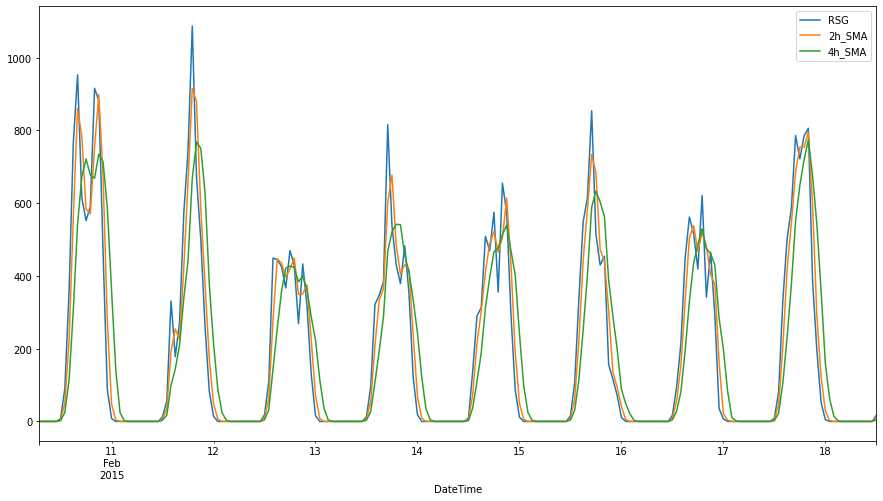

In [ ]:
df[:]['2015-02-10 7:00:00':'2015-02-18 12:00:00'].plot(figsize=(15,8));

## EWMA
Exponentially Weighted Moving Average: Promedio móvil ponderado exponencialmente
EWMA nos permitirá reducir el efecto de retraso de SMA y pondrá más peso en los valores que ocurrieron más recientemente. La cantidad de peso aplicada a los valores más recientes dependerá de los parámetros utilizados en EWMA, la fórmula con la que se calculan las estimaciones es:

$y_t = \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Donde $x_t$ son los valores de la variable, $w_i$ son los pesos (desde $i=0$ hasta $t$), y la $y_t$ es la estimación resultante.

4 horas

In [ ]:
df['EWMA4h'] = df['RSG'].ewm(span=4,adjust=False).mean()

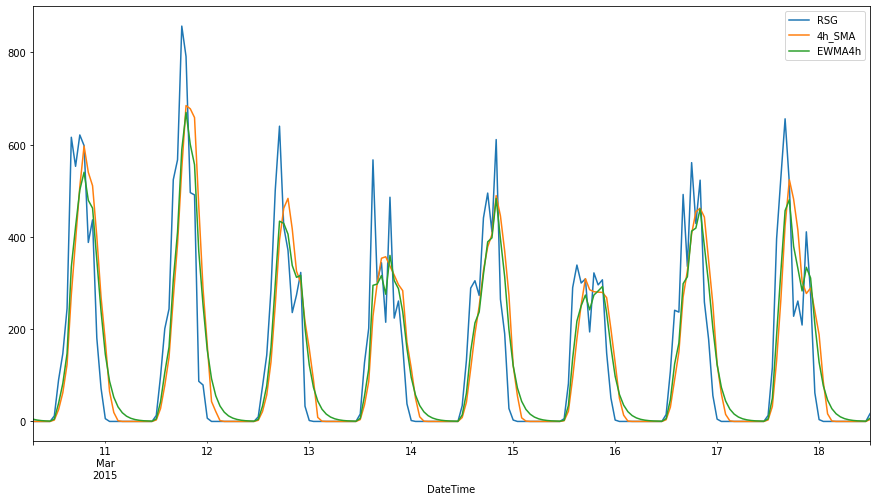

In [ ]:
df[['RSG','4h_SMA','EWMA4h']]['2015-03-10 7:00:00':'2015-03-18 12:00:00'].plot(figsize=(15,8));

6 horas

In [ ]:
df['EWMA6h'] = df['RSG'].ewm(span=6,adjust=False).mean()

A medida que la ventana crece, los resultados se vuelven pobres.

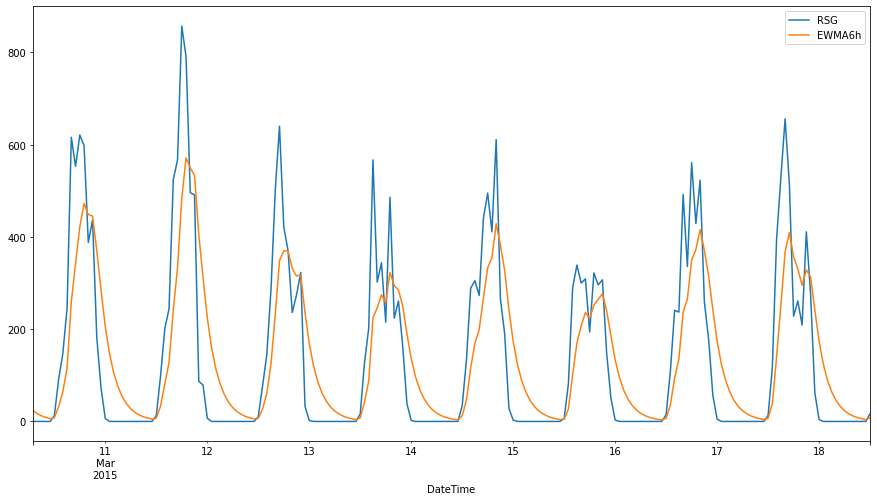

In [ ]:
df[['RSG','EWMA6h']]['2015-03-10 7:00:00':'2015-03-18 12:00:00'].plot(figsize=(15,8));

¿SMA obtiene mejores resultados?

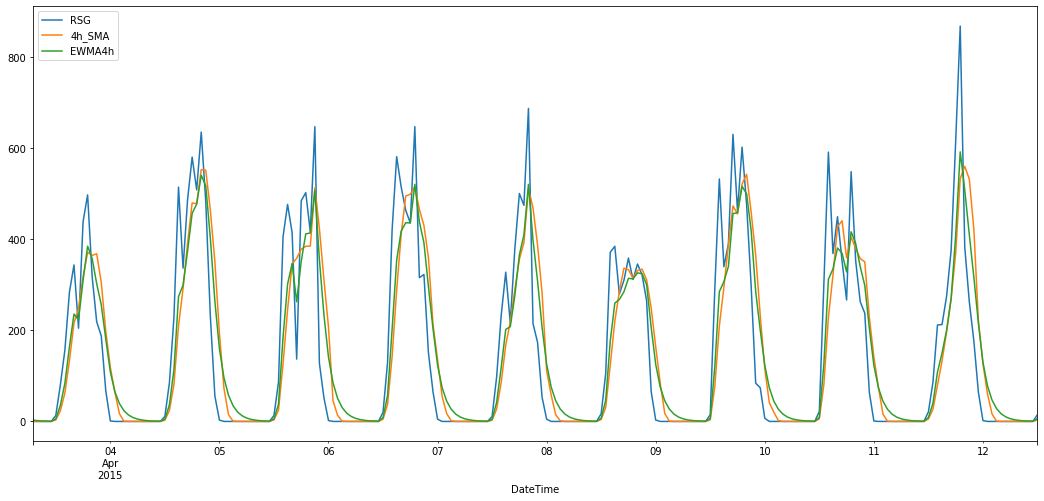

In [ ]:
df[['RSG','4h_SMA','EWMA4h']]['2015-04-3 7:00:00':'2015-04-12 12:00:00'].plot(figsize=(18,8));